In [ ]:
# We will attempt to get data on regular season wins and postseason wins for each team going back twenty years or 
#as long as the API has data for.  We are using sportsradar api

In [9]:
# Sportradar documentation: 

#This endpoint retrieves the current Standings.

# https://api.sportradar.us/nba/{access_level}/{version}/{language_code}/seasons/{season_year}/{nba_season}/
#standings.{format}?api_key={your_api_key}

In [10]:
# We will run a test first, but some of the items for the test will persist

In [157]:
#dependencies


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from sportradar_apikey import kims_apikey
nba_csv_file = "NBASalaryDataCSV.csv"

In [158]:
#dependencies


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from sportradar_apikey import kims_apikey
nba_csv_file = "NBASalaryDataCSV.csv"

In [162]:
#dependencies


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from sportradar_apikey import kims_apikey
nba_csv_file = "NBASalaryDataCSV.csv"

,Team,Cap,Rank,YearMeanCap,RelativePay
0,Bulls2018,"$90,105,625",1,"$110,191,023",81.8%
1,Suns2018,"$92,518,634",2,"$110,191,023",84.0%
2,Pacers2018,"$93,661,969",3,"$110,191,023",85.0%
3,Magic2018,"$95,538,311",4,"$110,191,023",86.7%
4,Nets2018,"$95,964,560",5,"$110,191,023",87.1%
5,Mavericks2018,"$96,843,033",6,"$110,191,023",87.9%
6,Kings2018,"$97,154,206",7,"$110,191,023",88.2%
7,76ers2018,"$100,020,936",8,"$110,191,023",90.8%
8,Hawks2018,"$100,108,457",9,"$110,191,023",90.8%
9,Lakers2018,"$102,177,393",10,"$110,191,023",92.7%


In [166]:
nba_salary_df = nba_salary_df.rename(columns={"Team":"ConcatName"})
nba_salary_df.head()

,ConcatName,Cap,Rank,YearMeanCap,RelativePay
0,Bulls2018,"$90,105,625",1,"$110,191,023",81.8%
1,Suns2018,"$92,518,634",2,"$110,191,023",84.0%
2,Pacers2018,"$93,661,969",3,"$110,191,023",85.0%
3,Magic2018,"$95,538,311",4,"$110,191,023",86.7%
4,Nets2018,"$95,964,560",5,"$110,191,023",87.1%


In [146]:
#Parameters


access_level = "trial"
version = "v5"
language_code = "en"
#Season year in Four Digit Format; Also, will need to make this a list when not in "test" mode
season_year = ["2013","2014","2015","2016","2017","2018"]
#nba_season refers to Pre, Regular, or Post; options are PRE, REG or PST
nba_season = "REG"
format_parameter = "json"
#need to remove key if it works
api_key = kims_apikey
base_url = "https://api.sportradar.us/nba/"

In [145]:
#print(kims_apikey)

In [86]:
#NBA Specific Info Needed for Queries:

In [87]:
#Eastern_Conference_Divisions = ["Atlantic","Central","Southeast"]

In [88]:
#Western_Conference_Divisions = ["Northwest","Pacific","Southwest"]

In [89]:
#Atlantic_Division_Teams = ["Raptors", "76ers","Celtics","Nets","Knicks"]
#Central_Division_Teams = ["Bucks","Pacers","Pistons","Bulls","Cavaliers"]

In [126]:
# Lists to Hold Data

teams = []
division_list=[]
conference_list=[]
wins = []
losses = []
win_pct = []
points_for_list=[]
points_against_list=[]
cities = []
season_list =[]
regular_or_pst = []

In [127]:
nba_responses_dict = {}

In [91]:
#url assembly

#nba_url = f"{base_url}{access_level}/{version}/{language_code}/seasons/{season}/{nba_season}/standings/.{format_parameter}?api_key={api_key}"

#print(nba_url)

In [128]:
for season in season_year:
    #Finish URL 
    nba_url = f"{base_url}{access_level}/{version}/{language_code}/seasons/{season}/{nba_season}/standings.{format_parameter}?api_key={api_key}"
    #print(nba_url)
    nba_response = requests.get(nba_url).json()
    time.sleep(2)
    nba_responses_dict[season]=nba_response
    season=season
    

In [129]:
nba_responses_dict["2013"]

{'league': {'id': '4353138d-4c22-4396-95d8-5f587d2df25c',
  'name': 'NBA',
  'alias': 'NBA'},
 'season': {'id': '5ddc217a-a958-4616-9bdf-e081022c440b',
  'year': 2013,
  'type': 'REG'},
 'conferences': [{'id': '7fe7e212-de01-4f8f-a31d-b9f0a95731e3',
   'name': 'WESTERN CONFERENCE',
   'alias': 'WESTERN',
   'divisions': [{'id': 'f074cb3e-90cf-42e1-8067-cdbcd99ec230',
     'name': 'Pacific',
     'alias': 'PACIFIC',
     'teams': [{'id': '583ecdfb-fb46-11e1-82cb-f4ce4684ea4c',
       'name': 'Clippers',
       'market': 'Los Angeles',
       'wins': 57,
       'losses': 25,
       'win_pct': 0.695,
       'points_for': 107.93,
       'points_against': 100.95,
       'point_diff': 6.98,
       'sr_id': 'sr:team:3425',
       'reference': '1610612746',
       'games_behind': {'league': 5.0, 'conference': 5.0, 'division': 0.0},
       'streak': {'kind': 'loss', 'length': 1},
       'records': [{'record_type': 'atlantic',
         'wins': 9,
         'losses': 1,
         'win_pct': 0.9},
 

In [131]:
nba_responses_dict.keys()

dict_keys(['2013', '2014', '2015', '2016', '2017', '2018'])

In [93]:
pprint(nba_response)

{'conferences': [{'alias': 'EASTERN',
                  'divisions': [{'alias': 'SOUTHEAST',
                                 'id': '54dc7348-c1d2-40d8-88b3-c4c0138e085d',
                                 'name': 'Southeast',
                                 'teams': [{'games_behind': {'conference': 0.0,
                                                             'division': 0.0,
                                                             'league': 7.0},
                                            'id': '583ecb8f-fb46-11e1-82cb-f4ce4684ea4c',
                                            'losses': 22,
                                            'market': 'Atlanta',
                                            'name': 'Hawks',
                                            'point_diff': 5.43,
                                            'points_against': 97.12,
                                            'points_for': 102.55,
                                            'records': [{'losses':

                                                         'wins': 6},
                                                        {'losses': 1,
                                                         'record_type': 'leads_field_goal_pct',
                                                         'win_pct': 0.667,
                                                         'wins': 2},
                                                        {'losses': 1,
                                                         'record_type': 'leads_rebounds',
                                                         'win_pct': 0.0,
                                                         'wins': 0},
                                                        {'losses': 4,
                                                         'record_type': 'northwest',
                                                         'win_pct': 0.6,
                                                         'wins': 6},
                      

                                                        {'losses': 25,
                                                         'record_type': 'ten_points',
                                                         'win_pct': 0.432,
                                                         'wins': 19},
                                                        {'losses': 6,
                                                         'record_type': 'three_points',
                                                         'win_pct': 0.538,
                                                         'wins': 7}],
                                            'reference': '1610612765',
                                            'sr_id': 'sr:team:3424',
                                            'streak': {'kind': 'win',
                                                       'length': 1},
                                            'win_pct': 0.39,
                                            'wins': 32}

                                            'sr_id': 'sr:team:3418',
                                            'streak': {'kind': 'win',
                                                       'length': 2},
                                            'win_pct': 0.549,
                                            'wins': 45},
                                           {'games_behind': {'conference': 29.0,
                                                             'division': 13.0,
                                                             'league': 29.0},
                                            'id': '583ece50-fb46-11e1-82cb-f4ce4684ea4c',
                                            'losses': 44,
                                            'market': 'Utah',
                                            'name': 'Jazz',
                                            'point_diff': 0.22,
                                            'points_against': 94.92,
                                

                                                         'record_type': 'atlantic',
                                                         'win_pct': 0.4,
                                                         'wins': 4},
                                                        {'losses': 23,
                                                         'record_type': 'below_500',
                                                         'win_pct': 0.343,
                                                         'wins': 12},
                                                        {'losses': 5,
                                                         'record_type': 'central',
                                                         'win_pct': 0.5,
                                                         'wins': 5},
                                                        {'losses': 43,
                                                         'record_type': 'conference',
                     

In [133]:
# Will attempt to use multi-layered loops to minimize lines of code.  Our goal is to collect data for each team.
# To do this will attempt a team loop within a division loop within a conference loop. 

# THIS WHOLE THING PROBABLY NEEDS TO BE SHIFTED OVER and SUBMERGED UNDER THE SEASON LOOP  HOW TO DO?


for season in season_year:
    nba_response = nba_responses_dict[season]

    for conference in nba_response['conferences']:
        conference_name = conference['alias']
        print(f"Now analyzying teams in the {conference_name} conference")
        for division in conference["divisions"]:
            division_name = division['alias']
            print(f"Now analyzing teams in the {division_name} division of the {conference_name} conference")
            for team in division["teams"]:
                team_name = team['name']
                print(f"{team_name} is in the {division_name} division of the {conference_name} conference")
                teams.append(team_name)
                division_list.append(division_name)
                conference_list.append(conference_name)
                wins.append(team["wins"])
                losses.append(team["losses"])
                win_pct.append(team["win_pct"])
                points_for_list.append(team["points_for"])
                points_against_list.append(team["points_against"])
                cities.append(team['market'])
                season_list.append(season)
                team_count = len(teams)
                if nba_season == "REG":
                    regular_or_pst.append("Regular")
                    if nba_season == "PST":
                        regular_or_post.append("Playoffs")
                        #Need otherwise statement
            print(f"Team count is now {team_count}")

            
    


Now analyzying teams in the WESTERN conference
Now analyzing teams in the PACIFIC division of the WESTERN conference
Clippers is in the PACIFIC division of the WESTERN conference
Warriors is in the PACIFIC division of the WESTERN conference
Suns is in the PACIFIC division of the WESTERN conference
Kings is in the PACIFIC division of the WESTERN conference
Lakers is in the PACIFIC division of the WESTERN conference
Team count is now 5
Now analyzing teams in the SOUTHWEST division of the WESTERN conference
Spurs is in the SOUTHWEST division of the WESTERN conference
Rockets is in the SOUTHWEST division of the WESTERN conference
Grizzlies is in the SOUTHWEST division of the WESTERN conference
Mavericks is in the SOUTHWEST division of the WESTERN conference
Pelicans is in the SOUTHWEST division of the WESTERN conference
Team count is now 10
Now analyzing teams in the NORTHWEST division of the WESTERN conference
Thunder is in the NORTHWEST division of the WESTERN conference
Trail Blazers is

In [134]:
season_list


['2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 

In [135]:
len(season_list)

180

In [136]:
NBA_df = pd.DataFrame({"Season": season_list, "Regular Season or Playoffs": regular_or_pst,"City": cities,"Team": teams,"Conference": conference_list,"Division": division_list,"Wins": wins,"Losses": losses, "Win Pct.": win_pct,"Points For": points_for_list, "Points Against": points_against_list})

In [137]:
NBA_df

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24
5,2013,Regular,San Antonio,Spurs,WESTERN,SOUTHWEST,62,20,0.756,105.35,97.63
6,2013,Regular,Houston,Rockets,WESTERN,SOUTHWEST,54,28,0.659,107.67,103.11
7,2013,Regular,Memphis,Grizzlies,WESTERN,SOUTHWEST,50,32,0.610,96.15,94.57
8,2013,Regular,Dallas,Mavericks,WESTERN,SOUTHWEST,49,33,0.598,104.84,102.44
9,2013,Regular,New Orleans,Pelicans,WESTERN,SOUTHWEST,34,48,0.415,99.72,102.43


In [138]:
NBA_df["ConcatName"]=NBA_df["Team"]+NBA_df["Season"].map(str)

In [139]:
NBA_df

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013
5,2013,Regular,San Antonio,Spurs,WESTERN,SOUTHWEST,62,20,0.756,105.35,97.63,Spurs2013
6,2013,Regular,Houston,Rockets,WESTERN,SOUTHWEST,54,28,0.659,107.67,103.11,Rockets2013
7,2013,Regular,Memphis,Grizzlies,WESTERN,SOUTHWEST,50,32,0.610,96.15,94.57,Grizzlies2013
8,2013,Regular,Dallas,Mavericks,WESTERN,SOUTHWEST,49,33,0.598,104.84,102.44,Mavericks2013
9,2013,Regular,New Orleans,Pelicans,WESTERN,SOUTHWEST,34,48,0.415,99.72,102.43,Pelicans2013


In [167]:
nba_combined_df =pd.merge(NBA_df,nba_salary_df,on="ConcatName")

In [168]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6%
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9%
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3%
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8%
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8%


In [186]:
nba_combined_df = nba_combined_df.replace(to_replace="%", value='',regex=True)


In [187]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8


In [188]:
nba_combined_df["RelativePay"] = nba_combined_df["RelativePay"].astype(float)

In [189]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8


In [192]:
nba_combined_df.dtypes

Season                         object
Regular Season or Playoffs     object
City                           object
Team                           object
Conference                     object
Division                       object
Wins                            int64
Losses                          int64
Win Pct.                      float64
Points For                    float64
Points Against                float64
ConcatName                     object
Cap                            object
Rank                            int64
YearMeanCap                    object
RelativePay                   float64
dtype: object

In [193]:
x_axis = nba_combined_df["RelativePay"]
y_axis = nba_combined_df['Win Pct.']

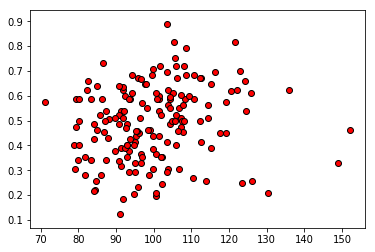

In [194]:
plt.scatter(x_axis,y_axis,marker="o",color="r",edgecolor="black")
plt.savefig("NBA Winning Percentage vs Relative Pay")

In [196]:
from scipy.stats import linregress

In [197]:
linregress(x_axis,y_axis)

LinregressResult(slope=0.001887432942416396, intercept=0.301648479841071, rvalue=0.16404735337975343, pvalue=0.033600104101857244, stderr=0.0008808955599279951)

In [ ]:
#BRINGING IN NFL SECTION HERE
